In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from lmfit.models import Pearson4Model, SkewedGaussianModel, SkewedVoigtModel, GaussianModel

In [3]:
df = pd.read_csv('gaia_100pc.csv')

In [4]:
df

,index,source_id,ra,dec,parallax,pmra,pmdec,epoch,ra_p,dec_p,cutout_status,max,sum,inside,min
0,616320,3864972938605115520,164.103190,7.002727,415.179416,-3866.338275,-2699.214988,2000.098,164.120448,7.014632,1,0.212736,1.226775,0.0,0.212736
1,263198,762815470562110464,165.830960,35.948653,392.752945,-580.057087,-4776.588719,1994.521,165.835130,35.977157,1,0.118364,0.092921,1.0,0.118364
2,685730,3796072592206250624,176.937688,0.799120,296.305308,607.299077,-1223.028355,1998.592,176.934697,0.805057,1,0.177692,0.008436,1.0,0.177692
3,380592,703790044252850688,127.450092,26.773286,279.249639,-1113.693547,-612.191073,1995.862,127.457151,26.776695,1,0.281003,0.404389,1.0,0.281003
4,813398,2552928187080872832,12.296740,5.376557,231.780000,1231.399465,-2711.882504,2009.218,12.294394,5.381661,1,0.344762,0.922290,0.0,0.344762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79072,748111,5761035592009134848,132.651076,-4.699385,10.000134,-39.836030,31.746516,2001.256,132.651237,-4.699515,1,0.240004,-0.088818,0.0,0.240004
79073,662194,3809611737872457856,162.873900,3.317327,10.000134,48.366999,3.981069,1998.516,162.873663,3.317309,1,0.274316,1.367879,1.0,0.274316
79074,137217,1407928457594520576,253.502181,47.883362,10.000129,-15.734855,49.408530,1997.258,253.502307,47.883106,1,0.285634,0.977211,1.0,0.285634
79075,983725,2629631149026173952,337.052475,-1.761859,10.000042,37.693628,-98.718081,1995.935,337.052262,-1.761310,1,0.356255,-1.935598,1.0,0.356255


In [5]:
data = df.dropna(subset=['inside']).rename(columns={'max': 'max_col', 'sum': 'sum_col'}).reset_index(drop=True)

# Limites

In [27]:
data = df.dropna(subset=['inside']).rename(columns={'max': 'max_col', 'sum': 'sum_col'}).reset_index(drop=True)

In [42]:
# Create a histogram for 'sum_col' with bins of 0.02
bin_width = 0.02
bins = np.arange(data['max_col'].min(), data['max_col'].max() + bin_width, bin_width)

counts, bin_edges = np.histogram(data['max_col'], bins=bins)

# Create a DataFrame for the frequency table
frequency_table = pd.DataFrame({'max_col': bin_edges[:-1], 'frequency': counts})

# Display the frequency table

frequency_table

,max_col,frequency
0,-0.675665,1
1,-0.655665,0
2,-0.635665,0
3,-0.615665,0
4,-0.595665,0
...,...,...
3036,60.044335,0
3037,60.064335,0
3038,60.084335,0
3039,60.104335,0


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 49
    # variables        = 3
    chi-square         = 163215.733
    reduced chi-square = 3548.16810
    Akaike info crit   = 403.439383
    Bayesian info crit = 409.114844
    R-squared          = 0.99917668
[[Variables]]
    amplitude:  1429.90125 +/- 9.39765970 (0.66%) (init = 0.981794)
    center:     0.20299892 +/- 7.1644e-04 (0.35%) (init = 0.2176987)
    sigma:      0.09737271 +/- 7.6503e-04 (0.79%) (init = 0.1041251)
    fwhm:       0.22929521 +/- 0.00180151 (0.79%) == '2.3548200*sigma'
    height:     5858.39790 +/- 26.0110198 (0.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = +0.8251
    C(center, sigma)     = +0.5721
    C(amplitude, center) = +0.5688


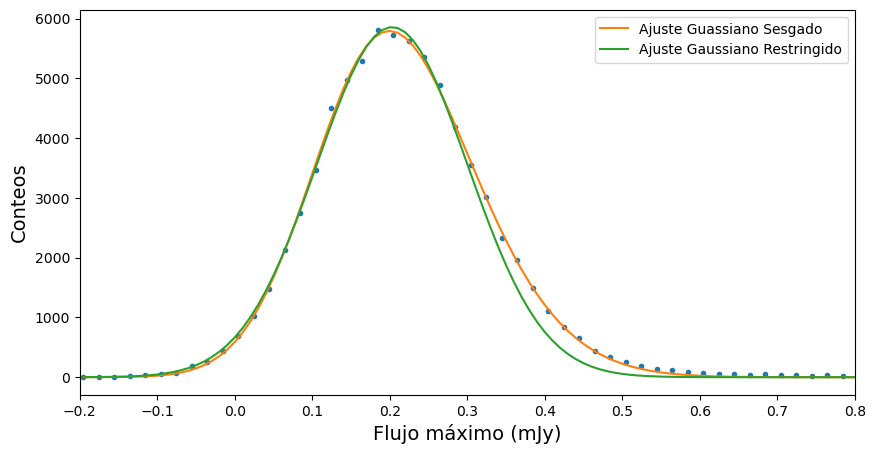

0.5


In [43]:
mod = SkewedGaussianModel()

frequency_table_max = frequency_table

x = frequency_table['max_col']
y = frequency_table['frequency']

x_max = frequency_table['max_col']
y_max = frequency_table['frequency']

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

x1 = np.arange(-0.3,2,0.01)
y1 = out.eval(x=x1)

mod2 = GaussianModel()


frequency_table_ = frequency_table.query('max_col<0.3')
x_ = frequency_table_['max_col']
y_ = frequency_table_['frequency']

pars = mod2.guess(y_, x=x_, center = 0.21769866, amplitude = 0.98179403, sigma = 0.10412506)
out2 = mod2.fit(y_, pars, x=x_)

x2 = np.arange(-0.3,2,0.01)
y2 = out2.eval(x=x2)

print(out2.fit_report())

plt.figure(figsize = (10, 5))
plt.plot(x, y, '.')
#plt.plot(x, out.init_fit, '--', label='initial fit')
plt.plot(x1, y1, '-', label='Ajuste Guassiano Sesgado')
plt.plot(x2, y2, '-', label='Ajuste Gaussiano Restringido')

#x_lim = out2.params['center'].value+2*out2.params['sigma'].value
x_lim = 0.5
#plt.axvline(x = x_lim, color = 'b', label = 'axvline - full height')

plt.xlim(left = -0.2, right = 0.8)

plt.xlabel('Flujo máximo (mJy)', fontsize=14)
plt.ylabel('Conteos', fontsize=14)

plt.xticks(np.arange(-0.2, 0.9, 0.1))

plt.legend()

plt.savefig('gaussian_max.png', bbox_inches='tight')

plt.show()


print(x_lim)

In [9]:
print("lim", out2.params['center'].value+2*out2.params['sigma'].value)

print(f'{out2.params["center"].value}+2*{out2.params["sigma"].value}')

out2.params['amplitude'].value = 1

from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return out2.eval(x=x)

# call quad to integrate f from -2 to 2
res, err = quad(f, -10, 0.3979795598966528)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))
print(100-res*100)

lim 0.39774434132821573
0.20299891651188323+2*0.09737271240816625
The numerical result is 0.977380 (+-5.81324e-11)
2.262002324957706


In [65]:
# Create a histogram for 'sum_col' with bins of 0.02
bin_width = 0.1
bins = np.arange(data['sum_col'].min(), data['sum_col'].max() + bin_width, bin_width)

counts, bin_edges = np.histogram(data['sum_col'], bins=bins)

# Create a DataFrame for the frequency table
frequency_table = pd.DataFrame({'sum_col': bin_edges[:-1], 'frequency': counts})

# Display the frequency table

frequency_table

,sum_col,frequency
0,-12.441404,1
1,-12.341404,0
2,-12.241404,0
3,-12.141404,0
4,-12.041404,0
...,...,...
3101,297.658596,0
3102,297.758596,0
3103,297.858596,0
3104,297.958596,0


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 87
    # data points      = 128
    # variables        = 3
    chi-square         = 50802.5730
    reduced chi-square = 406.420584
    Akaike info crit   = 771.910018
    Bayesian info crit = 780.466109
    R-squared          = 0.99949723
[[Variables]]
    amplitude:  7391.22759 +/- 43.1606111 (0.58%) (init = 0.981794)
    center:    -0.07822676 +/- 0.00632949 (8.09%) (init = 0.2176987)
    sigma:      0.92806449 +/- 0.00512395 (0.55%) (init = 0.1041251)
    fwhm:       2.18542482 +/- 0.01206598 (0.55%) == '2.3548200*sigma'
    height:     3177.22892 +/- 6.98506939 (0.22%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = +0.9266
    C(amplitude, center) = +0.8927
    C(center, sigma)     = +0.8452


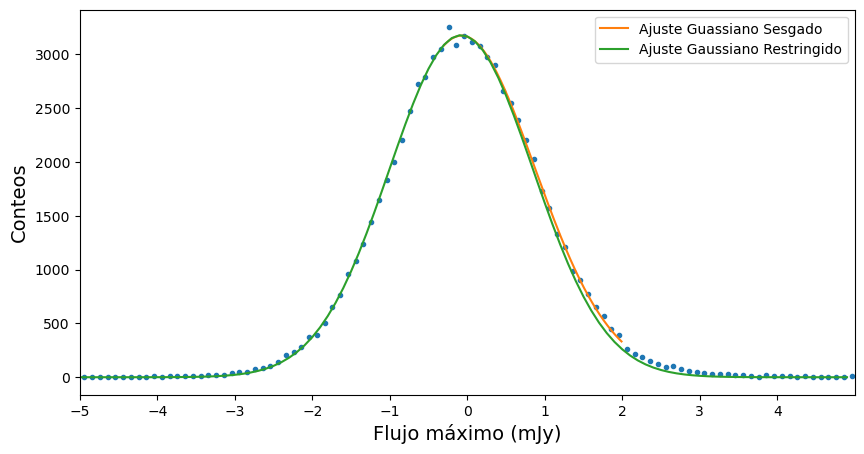

0.5


In [66]:
mod = SkewedGaussianModel()

frequency_table_sum = frequency_table

x = frequency_table['sum_col']
y = frequency_table['frequency']

x_sum = x
y_sum = y

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

x1 = np.arange(-0.3,2,0.01)
y1 = out.eval(x=x1)

mod2 = GaussianModel()


frequency_table_ = frequency_table.query('sum_col<0.3')
x_ = frequency_table_['sum_col']
y_ = frequency_table_['frequency']

pars = mod2.guess(y_, x=x_, center = 0.21769866, amplitude = 0.98179403, sigma = 0.10412506)
out2 = mod2.fit(y_, pars, x=x_)

x2 = np.arange(-5,5,0.1)
y2 = out2.eval(x=x2)

print(out2.fit_report())

plt.figure(figsize = (10, 5))
plt.plot(x, y, '.')
#plt.plot(x, out.init_fit, '--', label='initial fit')
plt.plot(x1, y1, '-', label='Ajuste Guassiano Sesgado')
plt.plot(x2, y2, '-', label='Ajuste Gaussiano Restringido')

#x_lim = out2.params['center'].value+2*out2.params['sigma'].value
x_lim = 0.5
#plt.axvline(x = x_lim, color = 'b', label = 'axvline - full height')

plt.xlim(left = -5, right = 5)

plt.xlabel('Flujo máximo (mJy)', fontsize=14)
plt.ylabel('Conteos', fontsize=14)

plt.xticks(np.arange(-5, 5, 1))

plt.legend()

plt.savefig('gaussian_max.png', bbox_inches='tight')

plt.show()


print(x_lim)

In [68]:
print("lim", out2.params['center'].value+2*out2.params['sigma'].value)

print(f'{out2.params["center"].value}+2*{out2.params["sigma"].value}')

out2.params['amplitude'].value = 1

from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return out2.eval(x=x)

# call quad to integrate f from -2 to 2
res, err = quad(f, -10, 0.3979795598966528)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))
print(100-res*100)

lim 1.7779002389045893
-0.07822745778731255+2*0.9280638483459509
The numerical result is 0.696066 (+-7.13191e-13)
30.393410716707862


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 69
    # data points      = 49
    # variables        = 3
    chi-square         = 163215.733
    reduced chi-square = 3548.16810
    Akaike info crit   = 403.439383
    Bayesian info crit = 409.114844
    R-squared          = 0.99917668
[[Variables]]
    amplitude:  1429.90125 +/- 9.39765970 (0.66%) (init = 0.981794)
    center:     0.20299892 +/- 7.1644e-04 (0.35%) (init = 0.2176987)
    sigma:      0.09737271 +/- 7.6503e-04 (0.79%) (init = 0.1041251)
    fwhm:       0.22929521 +/- 0.00180151 (0.79%) == '2.3548200*sigma'
    height:     5858.39790 +/- 26.0110198 (0.44%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma)  = +0.8251
    C(center, sigma)     = +0.5721
    C(amplitude, center) = +0.5688
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
 

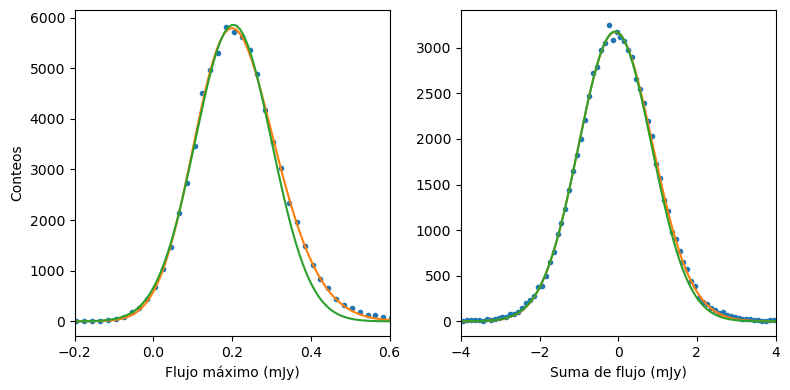

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Crear una figura con dos subplots horizontales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))  # 1 fila, 2 columnas

# Primer gráfico
mod = SkewedGaussianModel()

frequency_table = frequency_table_max

x = frequency_table['max_col']
y = frequency_table['frequency']

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

x1 = np.arange(-0.3,2,0.01)
y1 = out.eval(x=x1)

mod2 = GaussianModel()


frequency_table_ = frequency_table.query('max_col<0.3')
x_ = frequency_table_['max_col']
y_ = frequency_table_['frequency']

pars = mod2.guess(y_, x=x_, center = 0.21769866, amplitude = 0.98179403, sigma = 0.10412506)
out2 = mod2.fit(y_, pars, x=x_)

x2 = np.arange(-0.3,2,0.01)
y2 = out2.eval(x=x2)

print(out2.fit_report())

ax1.plot(x, y, '.')
#plt.plot(x, out.init_fit, '--', label='initial fit')
ax1.plot(x1, y1, '-', label='Ajuste Guassiano Sesgado')
ax1.plot(x2, y2, '-', label='Ajuste Gaussiano Restringido')

#x_lim = out2.params['center'].value+2*out2.params['sigma'].value
x_lim = 0.5
#plt.axvline(x = x_lim, color = 'b', label = 'axvline - full height')

ax1.set_xlim([-0.2, 0.6])

ax1.set_xlabel('Flujo máximo (mJy)')
ax1.set_ylabel('Conteos')

# Segundo gráfico
frequency_table = frequency_table_sum

x = x_sum
y = y_sum

pars = mod.guess(y, x=x)
out = mod.fit(y, pars, x=x)

x1 = np.arange(-5,5,0.01)
y1 = out.eval(x=x1)

mod2 = GaussianModel()


frequency_table_ = frequency_table.query('sum_col<0.3')
x_ = frequency_table_['sum_col']
y_ = frequency_table_['frequency']

pars = mod2.guess(y_, x=x_, center = 0, amplitude = 0.98179403, sigma = 0.10412506)
out2 = mod2.fit(y_, pars, x=x_)

x2 = np.arange(-5,5,0.01)
y2 = out2.eval(x=x2)

print(out2.fit_report())

ax2.plot(x, y, '.')
#plt.plot(x, out.init_fit, '--', label='initial fit')
ax2.plot(x1, y1, '-', label='Ajuste Guassiano Sesgado')
ax2.plot(x2, y2, '-', label='Ajuste Gaussiano Restringido')

#x_lim = out2.params['center'].value+2*out2.params['sigma'].value
x_lim = 0.5
#plt.axvline(x = x_lim, color = 'b', label = 'axvline - full height')

ax2.set_xlim([-4, 4])

ax2.set_xlabel('Suma de flujo (mJy)')

# Ajustar el espacio entre gráficos
plt.tight_layout()

plt.savefig('gaussian_max.png', bbox_inches='tight')

plt.show()


# Filter

In [76]:
df = pd.read_csv('gaia_100pc.csv')
df

,index,source_id,ra,dec,parallax,pmra,pmdec,epoch,ra_p,dec_p,cutout_status,max,sum,inside,min
0,616320,3864972938605115520,164.103190,7.002727,415.179416,-3866.338275,-2699.214988,2000.098,164.120448,7.014632,1,0.212736,1.226775,0.0,0.212736
1,263198,762815470562110464,165.830960,35.948653,392.752945,-580.057087,-4776.588719,1994.521,165.835130,35.977157,1,0.118364,0.092921,1.0,0.118364
2,685730,3796072592206250624,176.937688,0.799120,296.305308,607.299077,-1223.028355,1998.592,176.934697,0.805057,1,0.177692,0.008436,1.0,0.177692
3,380592,703790044252850688,127.450092,26.773286,279.249639,-1113.693547,-612.191073,1995.862,127.457151,26.776695,1,0.281003,0.404389,1.0,0.281003
4,813398,2552928187080872832,12.296740,5.376557,231.780000,1231.399465,-2711.882504,2009.218,12.294394,5.381661,1,0.344762,0.922290,0.0,0.344762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79072,748111,5761035592009134848,132.651076,-4.699385,10.000134,-39.836030,31.746516,2001.256,132.651237,-4.699515,1,0.240004,-0.088818,0.0,0.240004
79073,662194,3809611737872457856,162.873900,3.317327,10.000134,48.366999,3.981069,1998.516,162.873663,3.317309,1,0.274316,1.367879,1.0,0.274316
79074,137217,1407928457594520576,253.502181,47.883362,10.000129,-15.734855,49.408530,1997.258,253.502307,47.883106,1,0.285634,0.977211,1.0,0.285634
79075,983725,2629631149026173952,337.052475,-1.761859,10.000042,37.693628,-98.718081,1995.935,337.052262,-1.761310,1,0.356255,-1.935598,1.0,0.356255


In [78]:
data = df.dropna(subset=['max', 'sum']).rename(columns={'max': 'max_col', 'sum': 'sum_col'}).query('max_col>0.3977 and sum_col>1.8018 and inside>0')
data = data.reset_index(drop=True)
data.query("parallax>40")

,index,source_id,ra,dec,parallax,pmra,pmdec,epoch,ra_p,dec_p,cutout_status,max_col,sum_col,inside,min
0,592044,3902874650602495232,188.314493,9.022092,231.118498,-1795.660902,217.788567,2000.057,188.322601,9.021109,1,1.153666,6.945240,1.0,1.153666
1,592043,3902874650601954816,188.314677,9.021829,223.477474,-1710.467654,203.097809,2000.057,188.322401,9.020913,1,1.153666,6.945240,1.0,1.153666
2,455688,625453654702751872,154.898814,19.869810,201.406421,-498.620360,-43.427669,1998.765,154.901387,19.869998,1,0.583760,2.927984,1.0,0.583760
3,468430,660597997697274752,134.558692,19.762579,196.261926,-937.132836,-34.559037,1998.775,134.563506,19.762730,1,2.924361,12.600675,1.0,2.924361
4,468429,660597997696173440,134.559190,19.762960,194.144309,-767.060492,-100.176478,1998.775,134.563139,19.763425,1,2.924361,16.465033,1.0,2.924361
5,696732,3698534434669937024,183.564726,0.622727,123.642957,-951.335674,-284.049377,1998.601,183.569300,0.624109,1,0.519036,3.482847,1.0,0.519036
6,555469,3737308025029348608,195.191125,12.375595,86.900969,-628.715308,-33.471848,2000.005,195.194008,12.375734,1,0.432326,2.764903,1.0,0.432326
7,1004342,2635476908753563008,346.626522,-5.043528,80.212316,930.787523,-479.037541,2011.240,346.625292,-5.042892,1,0.405542,1.808508,1.0,0.405542
8,639754,3858896247076028288,159.002151,5.120787,65.470833,-654.120693,127.510718,2000.119,159.005054,5.120221,1,0.730477,4.057889,1.0,0.730477
9,506242,1235125877277843840,218.045847,16.013385,63.384928,178.425018,-70.526614,1999.912,218.045025,16.013691,1,0.599849,2.900332,1.0,0.599849


In [81]:
data = df.dropna(subset=['max', 'sum']).rename(columns={'max': 'max_col', 'sum': 'sum_col'}).query('max_col>0.4 and sum_col>1.8 and inside>0')
data = data.reset_index(drop=True)
data.query("parallax>40")

,index,source_id,ra,dec,parallax,pmra,pmdec,epoch,ra_p,dec_p,cutout_status,max_col,sum_col,inside,min
0,592044,3902874650602495232,188.314493,9.022092,231.118498,-1795.660902,217.788567,2000.057,188.322601,9.021109,1,1.153666,6.945240,1.0,1.153666
1,592043,3902874650601954816,188.314677,9.021829,223.477474,-1710.467654,203.097809,2000.057,188.322401,9.020913,1,1.153666,6.945240,1.0,1.153666
2,455688,625453654702751872,154.898814,19.869810,201.406421,-498.620360,-43.427669,1998.765,154.901387,19.869998,1,0.583760,2.927984,1.0,0.583760
3,468430,660597997697274752,134.558692,19.762579,196.261926,-937.132836,-34.559037,1998.775,134.563506,19.762730,1,2.924361,12.600675,1.0,2.924361
4,468429,660597997696173440,134.559190,19.762960,194.144309,-767.060492,-100.176478,1998.775,134.563139,19.763425,1,2.924361,16.465033,1.0,2.924361
5,696732,3698534434669937024,183.564726,0.622727,123.642957,-951.335674,-284.049377,1998.601,183.569300,0.624109,1,0.519036,3.482847,1.0,0.519036
6,555469,3737308025029348608,195.191125,12.375595,86.900969,-628.715308,-33.471848,2000.005,195.194008,12.375734,1,0.432326,2.764903,1.0,0.432326
7,1004342,2635476908753563008,346.626522,-5.043528,80.212316,930.787523,-479.037541,2011.240,346.625292,-5.042892,1,0.405542,1.808508,1.0,0.405542
8,639754,3858896247076028288,159.002151,5.120787,65.470833,-654.120693,127.510718,2000.119,159.005054,5.120221,1,0.730477,4.057889,1.0,0.730477
9,506242,1235125877277843840,218.045847,16.013385,63.384928,178.425018,-70.526614,1999.912,218.045025,16.013691,1,0.599849,2.900332,1.0,0.599849


In [ ]:
data = df.dropna(subset=['max', 'sum']).rename(columns={'max': 'max_col', 'sum': 'sum_col'}).query('max_col>0.3977 and sum_col>1.8018 and inside>0')
data = data.reset_index(drop=True)
data

In [15]:
data.query("parallax>40").to_csv('matches_25.csv', index=False)

# Prueba piloto

RESULTADO: se encontro a V* BF Lyn con minima emision maxima 

In [16]:
max_col = 0.502300
sum_col = 2.041019

In [17]:
data = df.dropna(subset=['max', 'sum']).rename(columns={'max': 'max_col', 'sum': 'sum_col'}).query(f'max_col>={max_col} and sum_col>={sum_col} and inside>0')
data = data.reset_index(drop=True)
data

,index,source_id,ra,dec,parallax,pmra,pmdec,epoch,ra_p,dec_p,cutout_status,max_col,sum_col,inside,min
0,592044,3902874650602495232,188.314493,9.022092,231.118498,-1795.660902,217.788567,2000.057,188.322601,9.021109,1,1.153666,6.945240,1.0,1.153666
1,592043,3902874650601954816,188.314677,9.021829,223.477474,-1710.467654,203.097809,2000.057,188.322401,9.020913,1,1.153666,6.945240,1.0,1.153666
2,455688,625453654702751872,154.898814,19.869810,201.406421,-498.620360,-43.427669,1998.765,154.901387,19.869998,1,0.583760,2.927984,1.0,0.583760
3,468430,660597997697274752,134.558692,19.762579,196.261926,-937.132836,-34.559037,1998.775,134.563506,19.762730,1,2.924361,12.600675,1.0,2.924361
4,468429,660597997696173440,134.559190,19.762960,194.144309,-767.060492,-100.176478,1998.775,134.563139,19.763425,1,2.924361,16.465033,1.0,2.924361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,993136,2634171925890359808,351.259046,-3.860355,10.009431,119.017233,-323.936559,2011.187,351.258886,-3.859921,1,1.061201,4.462688,1.0,1.061201
359,603296,3865750770066866048,161.703062,8.055359,10.008618,-0.586193,-0.421742,2000.074,161.703066,8.055360,1,1.764963,11.115192,1.0,1.764963
360,27067,1003077727808409088,105.556833,61.060593,10.007198,-77.817724,-93.987151,2002.510,105.557436,61.060943,1,0.534638,2.253918,1.0,0.534638
361,127809,834832584532943488,156.761784,49.360269,10.006682,-84.537583,-15.066030,1997.287,156.762456,49.360349,1,0.541934,2.606073,1.0,0.541934


In [18]:
max_col = 0.50
sum_col = 2.0

In [19]:
data = df.dropna(subset=['max', 'sum']).rename(columns={'max': 'max_col', 'sum': 'sum_col'}).query(f'max_col>{max_col} and sum_col>{sum_col} and inside>0')
data = data.reset_index(drop=True)
data

,index,source_id,ra,dec,parallax,pmra,pmdec,epoch,ra_p,dec_p,cutout_status,max_col,sum_col,inside,min
0,592044,3902874650602495232,188.314493,9.022092,231.118498,-1795.660902,217.788567,2000.057,188.322601,9.021109,1,1.153666,6.945240,1.0,1.153666
1,592043,3902874650601954816,188.314677,9.021829,223.477474,-1710.467654,203.097809,2000.057,188.322401,9.020913,1,1.153666,6.945240,1.0,1.153666
2,455688,625453654702751872,154.898814,19.869810,201.406421,-498.620360,-43.427669,1998.765,154.901387,19.869998,1,0.583760,2.927984,1.0,0.583760
3,468430,660597997697274752,134.558692,19.762579,196.261926,-937.132836,-34.559037,1998.775,134.563506,19.762730,1,2.924361,12.600675,1.0,2.924361
4,468429,660597997696173440,134.559190,19.762960,194.144309,-767.060492,-100.176478,1998.775,134.563139,19.763425,1,2.924361,16.465033,1.0,2.924361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,993136,2634171925890359808,351.259046,-3.860355,10.009431,119.017233,-323.936559,2011.187,351.258886,-3.859921,1,1.061201,4.462688,1.0,1.061201
369,603296,3865750770066866048,161.703062,8.055359,10.008618,-0.586193,-0.421742,2000.074,161.703066,8.055360,1,1.764963,11.115192,1.0,1.764963
370,27067,1003077727808409088,105.556833,61.060593,10.007198,-77.817724,-93.987151,2002.510,105.557436,61.060943,1,0.534638,2.253918,1.0,0.534638
371,127809,834832584532943488,156.761784,49.360269,10.006682,-84.537583,-15.066030,1997.287,156.762456,49.360349,1,0.541934,2.606073,1.0,0.541934


In [20]:
data.to_csv('matches_100pc.csv', index=False)

# xd